In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("\n" + "="*70)
print("LOAD DATASET")
print("="*70)
# Load dataset
df = pd.read_csv('processed_winequality.csv')
df.head()


LOAD DATASET


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [30]:
# Basic exploration
print("\n" + "="*70)
print("DATA EXPLORATION")
print("="*70)
print(df.shape)  
print(df.info())
print(df.describe())


DATA EXPLORATION
(6497, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB
None
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000 

In [31]:
print("\n" + "="*70)
print("NULL CHECK")
print("="*70)
# Check for missing values
print(df.isnull().sum())  # Expected: 0 missing values


NULL CHECK
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [32]:
# Check for duplicates
print("\n" + "="*70)
print("DUPLICATE CHECK")
print("="*70)
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
if duplicates > 0:
    print(f"Warning: {duplicates} duplicate rows found")
else:
    print("No duplicates found!")


DUPLICATE CHECK
Number of duplicate rows: 1179


In [33]:
print("\n" + "="*70)
print("QUALITY DISTRIBUTION")
print("="*70)
print(df['quality'].value_counts().sort_index())


QUALITY DISTRIBUTION
quality
3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: count, dtype: int64



Visualization 1: Quality Distribution


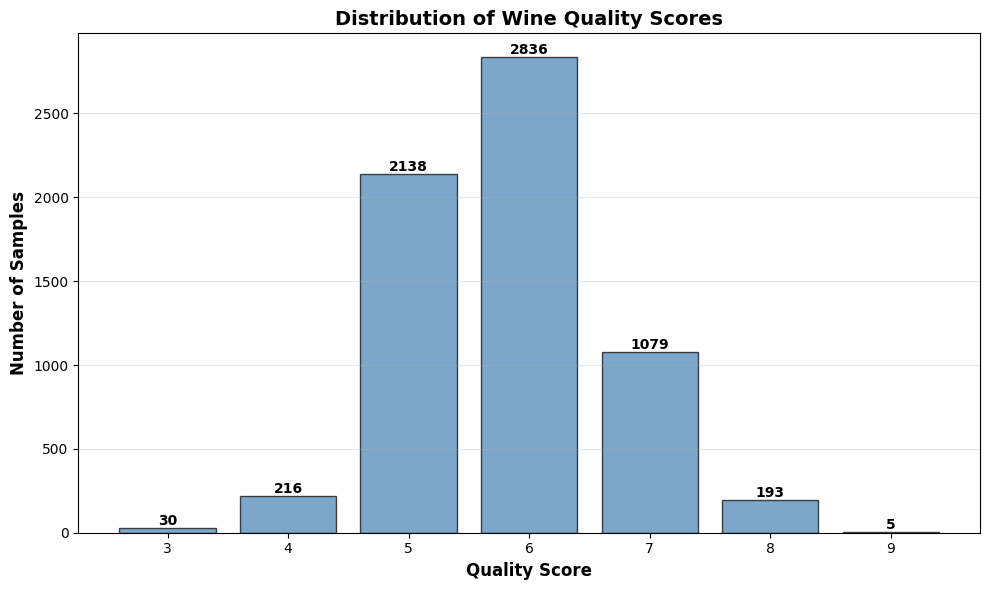

In [34]:
# ============================================================================
# VISUALIZATION 1: QUALITY DISTRIBUTION
# ============================================================================
print("\n" + "="*70)
print("Visualization 1: Quality Distribution")
print("="*70)
plt.figure(figsize=(10, 6))
quality_counts = df['quality'].value_counts().sort_index()
bars = plt.bar(quality_counts.index, quality_counts.values, 
               color='steelblue', edgecolor='black', alpha=0.7)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xlabel('Quality Score', fontsize=12, fontweight='bold')
plt.ylabel('Number of Samples', fontsize=12, fontweight='bold')
plt.title('Distribution of Wine Quality Scores', fontsize=14, fontweight='bold')
plt.xticks(quality_counts.index)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


Visualization 2: Correlation Heatmap


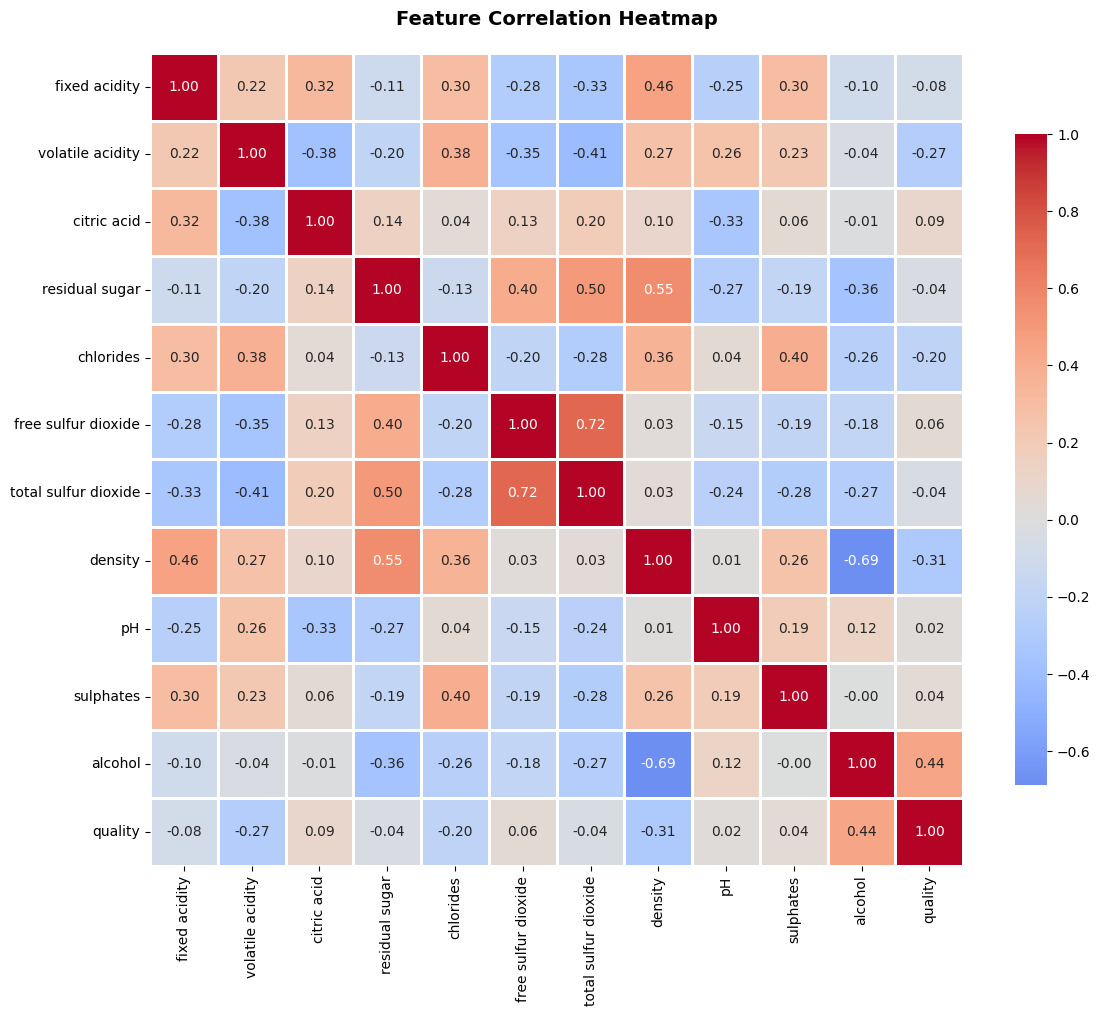


Top Features Correlated with Quality:
1. alcohol: 0.444
2. citric acid: 0.086
3. free sulfur dioxide: 0.055
4. sulphates: 0.038
5. pH: 0.020


In [35]:
# ============================================================================
# 4. VISUALIZATION 2: CORRELATION HEATMAP
# ============================================================================
print("\n" + "="*70)
print("Visualization 2: Correlation Heatmap")
print("="*70)
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', 
            cmap='coolwarm', center=0, square=True,
            linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Print top correlations with quality
print("\nTop Features Correlated with Quality:")
quality_corr = correlation_matrix['quality'].drop('quality').sort_values(ascending=False)
for i, (feature, corr) in enumerate(quality_corr.head(5).items(), 1):
    print(f"{i}. {feature}: {corr:.3f}")


Visualization 3: Histograms


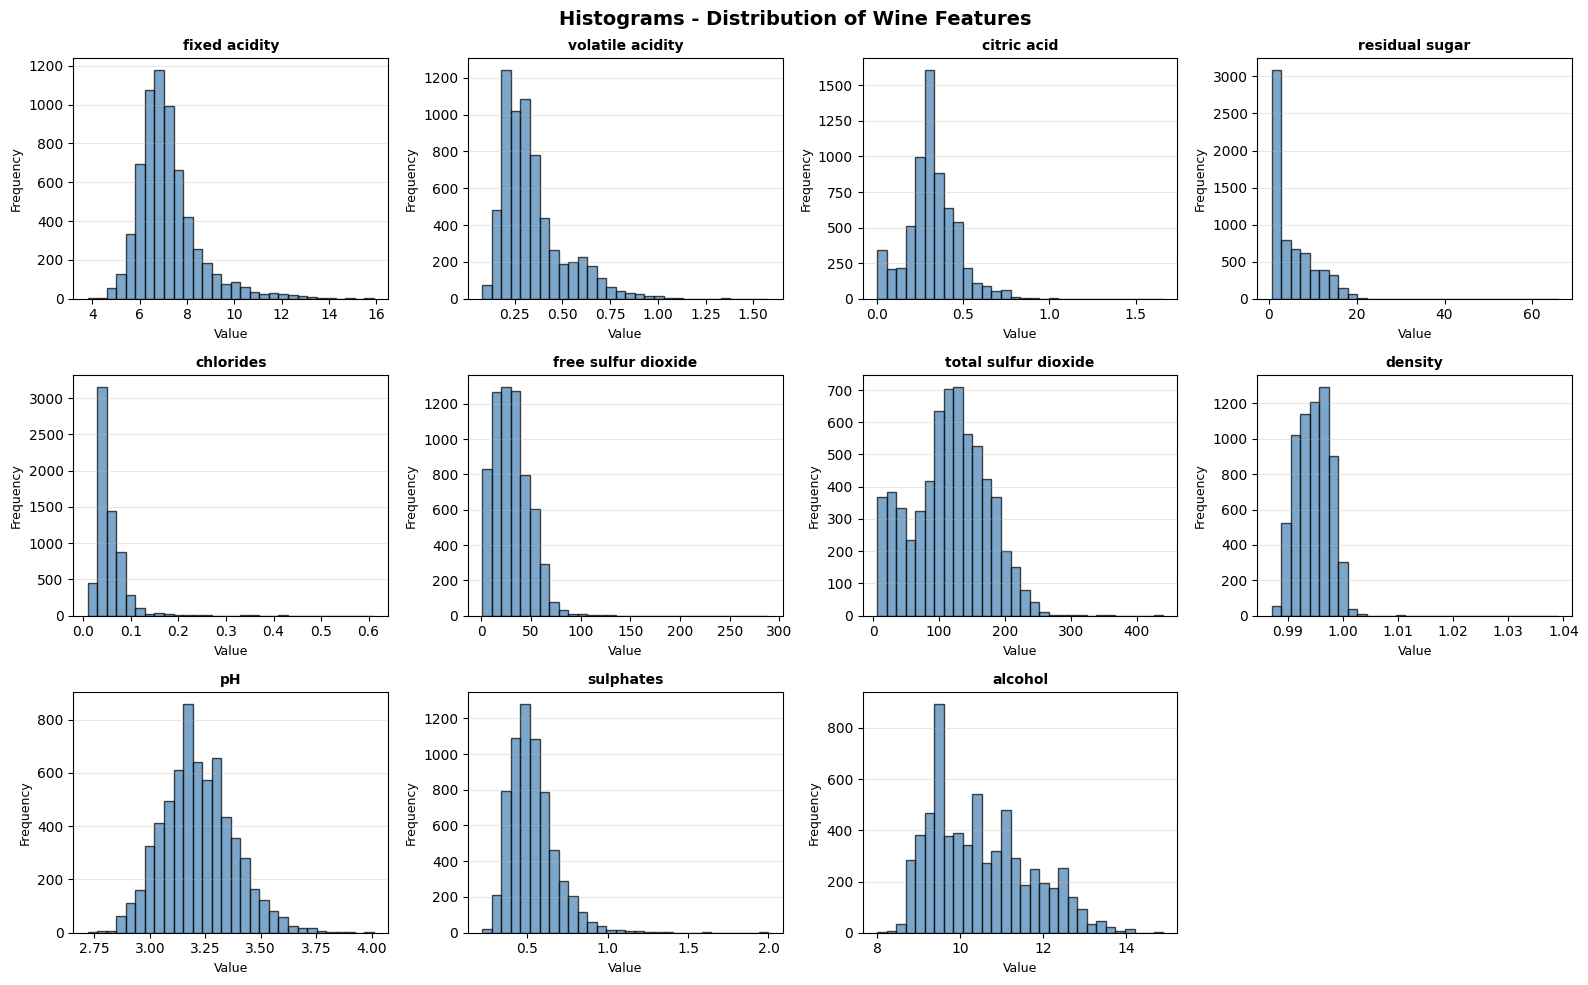

In [36]:
# ============================================================================
# 5. VISUALIZATION 3: HISTOGRAMS - FEATURE DISTRIBUTIONS
# ============================================================================
print("\n" + "="*70)
print("Visualization 3: Histograms")
print("="*70)
numerical_cols = df.select_dtypes(include=[np.number]).columns.drop('quality')

fig, axes = plt.subplots(3, 4, figsize=(16, 10))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    axes[idx].hist(df[col], bins=30, color='steelblue', 
                   edgecolor='black', alpha=0.7)
    axes[idx].set_title(col, fontsize=10, fontweight='bold')
    axes[idx].set_xlabel('Value', fontsize=9)
    axes[idx].set_ylabel('Frequency', fontsize=9)
    axes[idx].grid(axis='y', alpha=0.3)

# Hide empty subplot
axes[-1].axis('off')

fig.suptitle('Histograms - Distribution of Wine Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


Visualization 4: Boxplots


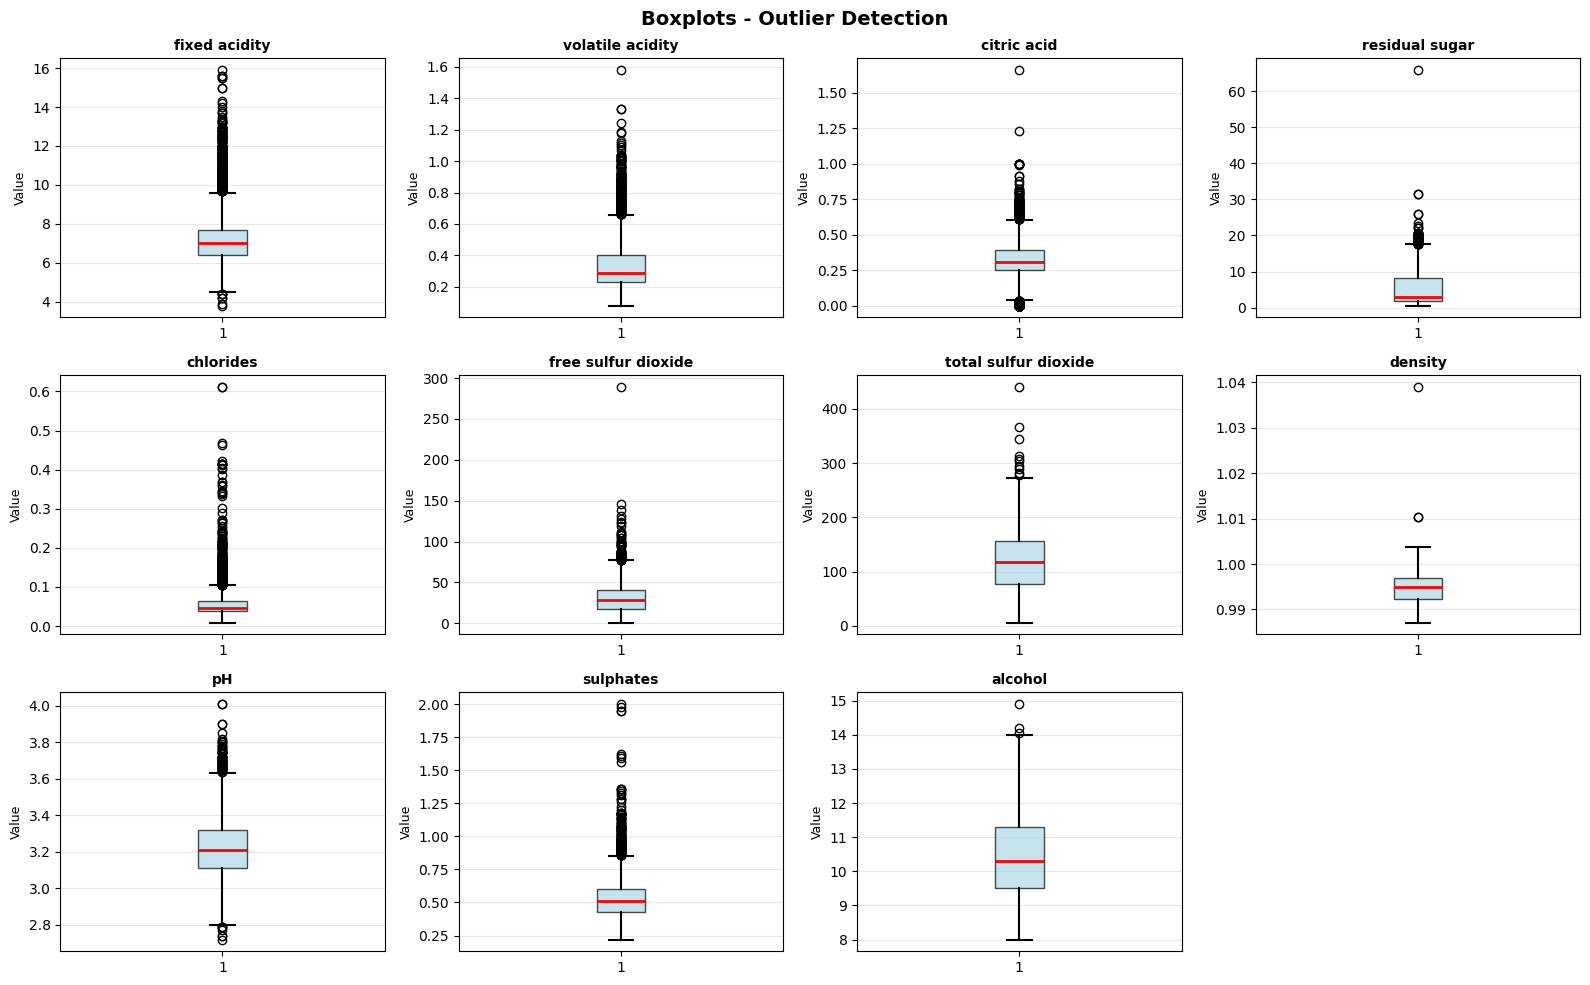

In [37]:
# ============================================================================
# 6. VISUALIZATION 4: BOXPLOTS - OUTLIER DETECTION
# ============================================================================
print("\n" + "="*70)
print("Visualization 4: Boxplots")
print("="*70)
fig, axes = plt.subplots(3, 4, figsize=(16, 10))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    axes[idx].boxplot(df[col], vert=True, patch_artist=True,
                     boxprops=dict(facecolor='lightblue', alpha=0.7),
                     medianprops=dict(color='red', linewidth=2),
                     whiskerprops=dict(linewidth=1.5),
                     capprops=dict(linewidth=1.5))
    axes[idx].set_title(col, fontsize=10, fontweight='bold')
    axes[idx].set_ylabel('Value', fontsize=9)
    axes[idx].grid(axis='y', alpha=0.3)

# Hide empty subplot
axes[-1].axis('off')

fig.suptitle('Boxplots - Outlier Detection', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


Visualization 5: Scatter Plots


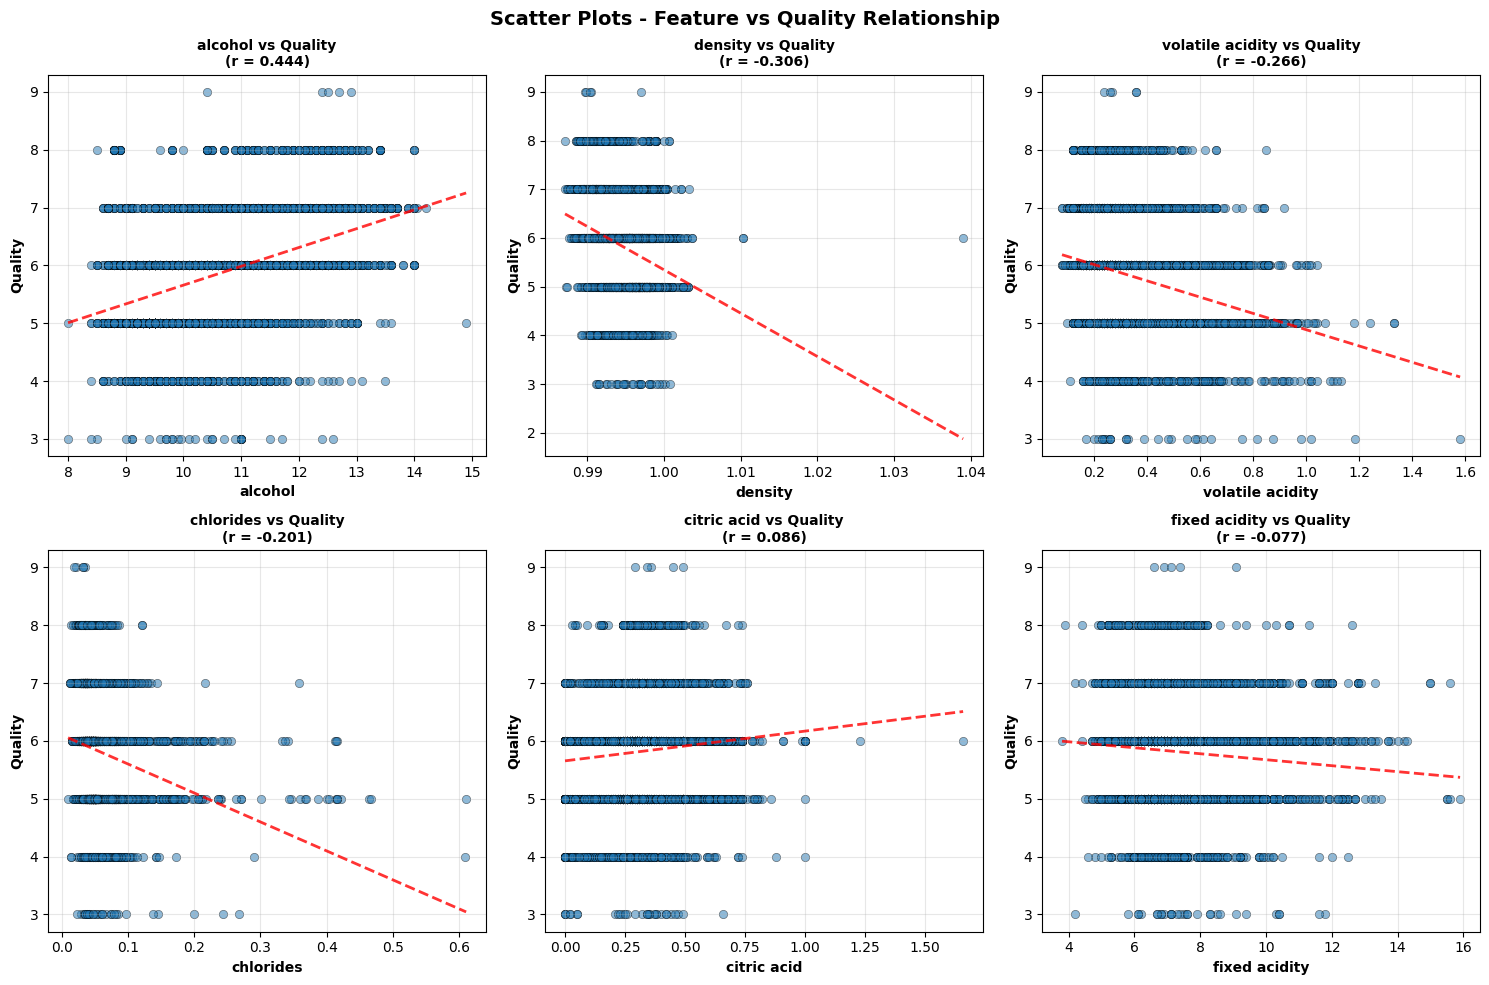

In [77]:
# ============================================================================
# 7. VISUALIZATION 5: SCATTER PLOTS - FEATURES VS QUALITY
# ============================================================================
print("\n" + "="*70)
print("Visualization 5: Scatter Plots")
print("="*70)
# Select top 6 features most correlated with quality for visualization
quality_corr = correlation_matrix['quality'].drop('quality').abs().sort_values(ascending=False)
top_features = quality_corr.head(6).index

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, feature in enumerate(top_features):
    axes[idx].scatter(df[feature], df['quality'], alpha=0.5, 
                     edgecolors='black', linewidth=0.5)
    
    # Add trend line
    z = np.polyfit(df[feature], df['quality'], 1)
    p = np.poly1d(z)
    x_trend = np.linspace(df[feature].min(), df[feature].max(), 100)
    axes[idx].plot(x_trend, p(x_trend), "r--", linewidth=2, alpha=0.8)
    
    corr = df[feature].corr(df['quality'])
    axes[idx].set_xlabel(feature, fontsize=10, fontweight='bold')
    axes[idx].set_ylabel('Quality', fontsize=10, fontweight='bold')
    axes[idx].set_title(f'{feature} vs Quality\n(r = {corr:.3f})', 
                       fontsize=10, fontweight='bold')
    axes[idx].grid(alpha=0.3)

fig.suptitle('Scatter Plots - Feature vs Quality Relationship', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [39]:
# ============================================================================
# 8. DATA PREPROCESSING
# ============================================================================
print("\n" + "="*70)
print("Data Preprocessing")
print("="*70)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Outlier detection using IQR method
def remove_outliers_iqr(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[
            (df_clean[col] >= lower_bound) & 
            (df_clean[col] <= upper_bound)
        ]
    return df_clean

# Apply outlier removal
numeric_cols = df.select_dtypes(include=[np.number]).columns.drop('quality')
df_clean = remove_outliers_iqr(df, numeric_cols)
print(f"Original size: {df.shape[0]}, After outlier removal: {df_clean.shape[0]}")

# Separate features and target
X = df_clean.drop('quality', axis=1)
y = df_clean['quality']

# Train-test split (80-20 with stratification)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")


Data Preprocessing
Original size: 6497, After outlier removal: 4596
Training set: (3676, 11)
Testing set: (920, 11)


In [40]:
# Model Implementation - Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pickle

# Initialize model
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1,
    verbose=1
)
# Train model
print("\n" + "="*70)
print("Random Forest")
print("="*70)
print("\nTraining Random Forest...")
rf_model.fit(X_train, y_train)


Random Forest

Training Random Forest...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished


RandomForestRegressor(n_jobs=-1, random_state=42, verbose=1)

In [41]:
# Predictions
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)
# Evaluation
train_rmse_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
test_rmse_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
train_r2_rf = r2_score(y_train, y_train_pred_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)
test_mae_rf = mean_absolute_error(y_test, y_test_pred_rf)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [42]:
print("\n" + "="*70)
print("Random Forest Results")
print("="*70)
print(f"Training RMSE: {train_rmse_rf:.4f}")
print(f"Testing RMSE: {test_rmse_rf:.4f}")
print(f"Training R² Score: {train_r2_rf:.4f}")
print(f"Testing R² Score: {test_r2_rf:.4f}")
print(f"Testing MAE: {test_mae_rf:.4f}")


Random Forest Results
Training RMSE: 0.2266
Testing RMSE: 0.5935
Training R² Score: 0.9314
Testing R² Score: 0.5302
Testing MAE: 0.4294


In [43]:
# Feature importance
feature_importance_rf = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)
print("\n" + "="*70)
print("Top 5 Important Features")
print("="*70)
print(feature_importance_rf.head())



Top 5 Important Features
                 feature  importance
10               alcohol    0.245794
1       volatile acidity    0.113741
5    free sulfur dioxide    0.092796
6   total sulfur dioxide    0.077349
8                     pH    0.075392


In [44]:
#Model Implementation - Gradient Boosting

from sklearn.ensemble import GradientBoostingRegressor

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize model
gb_model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    subsample=0.8,
    loss='squared_error',
    random_state=42,
    verbose=1
)

# Train model
print("\n" + "="*70)
print("Gradient Boosting")
print("="*70)
print("\nTraining Gradient Boosting...")
gb_model.fit(X_train_scaled, y_train)


Gradient Boosting

Training Gradient Boosting...
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.7020           0.0351            3.43s
         2           0.6883           0.1034            2.20s
         3           0.6602           0.0185            1.77s
         4           0.6308          -0.0074            1.54s
         5           0.6097           0.0059            1.37s
         6           0.5922           0.0145            1.21s
         7           0.5879           0.0520            1.08s
         8           0.5652          -0.0252            0.98s
         9           0.5560           0.0161            0.90s
        10           0.5490           0.0216            0.85s
        20           0.4881           0.0177            0.53s
        30           0.4673           0.0055            0.43s
        40           0.4341          -0.0621            0.34s
        50           0.4270          -0.0315            0.25s
        60         

GradientBoostingRegressor(random_state=42, subsample=0.8, verbose=1)

In [45]:
# Predictions
y_train_pred_gb = gb_model.predict(X_train_scaled)
y_test_pred_gb = gb_model.predict(X_test_scaled)

# Evaluation
train_rmse_gb = np.sqrt(mean_squared_error(y_train, y_train_pred_gb))
test_rmse_gb = np.sqrt(mean_squared_error(y_test, y_test_pred_gb))
train_r2_gb = r2_score(y_train, y_train_pred_gb)
test_r2_gb = r2_score(y_test, y_test_pred_gb)
test_mae_gb = mean_absolute_error(y_test, y_test_pred_gb)


In [46]:
print("\n" + "="*70)
print("Gradient Boosting Results")
print("="*70)
print(f"Training RMSE: {train_rmse_gb:.4f}")
print(f"Testing RMSE: {test_rmse_gb:.4f}")
print(f"Training R² Score: {train_r2_gb:.4f}")
print(f"Testing R² Score: {test_r2_gb:.4f}")
print(f"Testing MAE: {test_mae_gb:.4f}")


Gradient Boosting Results
Training RMSE: 0.6183
Testing RMSE: 0.6676
Training R² Score: 0.4889
Testing R² Score: 0.4055
Testing MAE: 0.5189



Visualization 6: Gradient Boosting Learning Curves


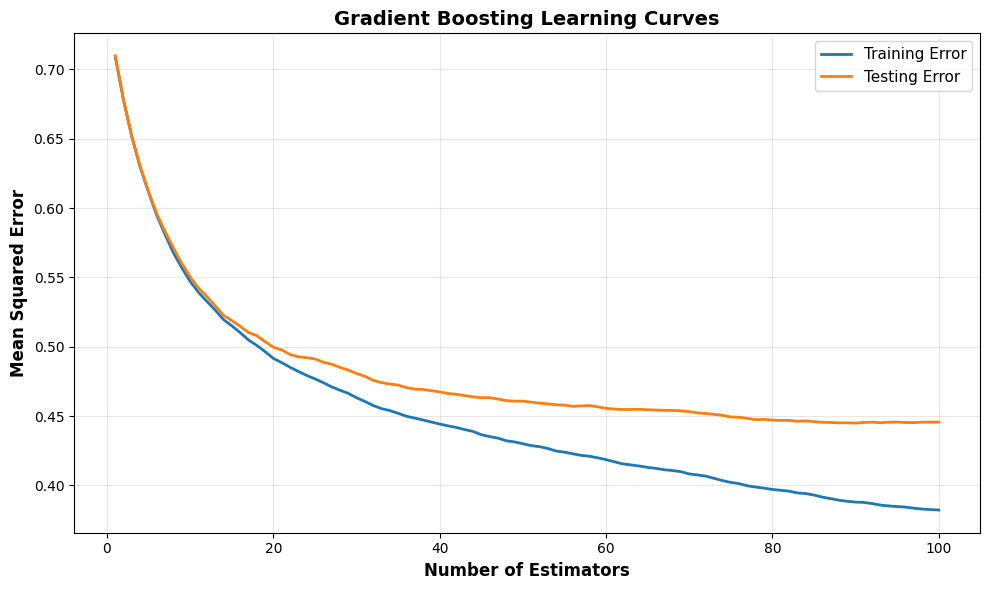

In [79]:
# Learning curves for Gradient Boosting
print("\n" + "="*70)
print("Visualization 6: Gradient Boosting Learning Curves")
print("="*70)
train_scores = []
test_scores = []

# Use staged_predict which returns a generator for all stages
for train_pred, test_pred in zip(gb_model.staged_predict(X_train_scaled), 
                                  gb_model.staged_predict(X_test_scaled)):
    train_scores.append(mean_squared_error(y_train, train_pred))
    test_scores.append(mean_squared_error(y_test, test_pred))

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_scores) + 1), train_scores, label='Training Error', linewidth=2)
plt.plot(range(1, len(test_scores) + 1), test_scores, label='Testing Error', linewidth=2)
plt.xlabel('Number of Estimators', fontsize=12, fontweight='bold')
plt.ylabel('Mean Squared Error', fontsize=12, fontweight='bold')
plt.title('Gradient Boosting Learning Curves', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [57]:
# Model Implementation - XGBoost

import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 1.5, 2]
}

# Initialize GridSearchCV
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    random_state=42
)

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=2
)

In [58]:
# Perform hyperparameter tuning
print("\n" + "="*70)
print("Hyperparameter Tuning for XGBoost")
print("="*70)
print("Performing hyperparameter tuning for XGBoost...")
grid_search.fit(X_train_scaled, y_train)

print(f"\nBest Parameters: {grid_search.best_params_}")
print(f"Best CV RMSE: {np.sqrt(-grid_search.best_score_):.4f}")


Hyperparameter Tuning for XGBoost
Performing hyperparameter tuning for XGBoost...
Fitting 5 folds for each of 972 candidates, totalling 4860 fits

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'reg_alpha': 0, 'reg_lambda': 1.5, 'subsample': 0.8}
Best CV RMSE: 0.6293


In [69]:
# Train final model with best parameters
xgb_final = xgb.XGBRegressor(
    **grid_search.best_params_,
    objective='reg:squarederror',
    eval_metric='rmse',  # Move eval_metric here
    random_state=42,
    early_stopping_rounds=10  # Move early_stopping_rounds here
)

# Fit the model with evaluation set
xgb_final.fit(
    X_train_scaled, y_train,
    eval_set=[(X_train_scaled, y_train), (X_test_scaled, y_test)],
    verbose=False
)

# Predictions
y_train_pred_xgb = xgb_final.predict(X_train_scaled)
y_test_pred_xgb = xgb_final.predict(X_test_scaled)

# Evaluation
train_rmse_xgb = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb))
test_rmse_xgb = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb))
train_r2_xgb = r2_score(y_train, y_train_pred_xgb)
test_r2_xgb = r2_score(y_test, y_test_pred_xgb)
test_mae_xgb = mean_absolute_error(y_test, y_test_pred_xgb)

In [70]:
print("\n" + "="*70)
print("XGBOOST MODEL PERFORMANCE")
print("="*70)
print(f"Training RMSE:     {train_rmse_xgb:.4f}")
print(f"Testing RMSE:      {test_rmse_xgb:.4f}")
print(f"Training R² Score: {train_r2_xgb:.4f}")
print(f"Testing R² Score:  {test_r2_xgb:.4f}")
print(f"Testing MAE:       {test_mae_xgb:.4f}")
print(f"Train-Test Gap:    {abs(train_rmse_xgb - test_rmse_xgb):.4f}")


XGBOOST MODEL PERFORMANCE
Training RMSE:     0.1675
Testing RMSE:      0.5962
Training R² Score: 0.9625
Testing R² Score:  0.5259
Testing MAE:       0.4163
Train-Test Gap:    0.4287


In [71]:
# ============================================================================
# 12. VISUALIZATION 7: MODEL COMPARISON
# ============================================================================
# Prepare comparison data using individual variables
models = ['Random Forest', 'Gradient Boosting', 'XGBoost']
test_rmse_values = [test_rmse_rf, test_rmse_gb, test_rmse_xgb]
test_r2_values = [test_r2_rf, test_r2_gb, test_r2_xgb]
test_mae_values = [test_mae_rf, test_mae_gb, test_mae_xgb]

# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Test RMSE': test_rmse_values,
    'Test R² Score': test_r2_values,
    'Test MAE': test_mae_values
}, index=models)

print("\n" + "="*70)
print("Model Performance Comparison:")
print("="*70)
print(comparison_df.to_string())



Model Performance Comparison:
                   Test RMSE  Test R² Score  Test MAE
Random Forest       0.593466       0.530209  0.429446
Gradient Boosting   0.667600       0.405508  0.518947
XGBoost             0.596184       0.525895  0.416325



Visualization 7: Model Performance Comparison Charts:


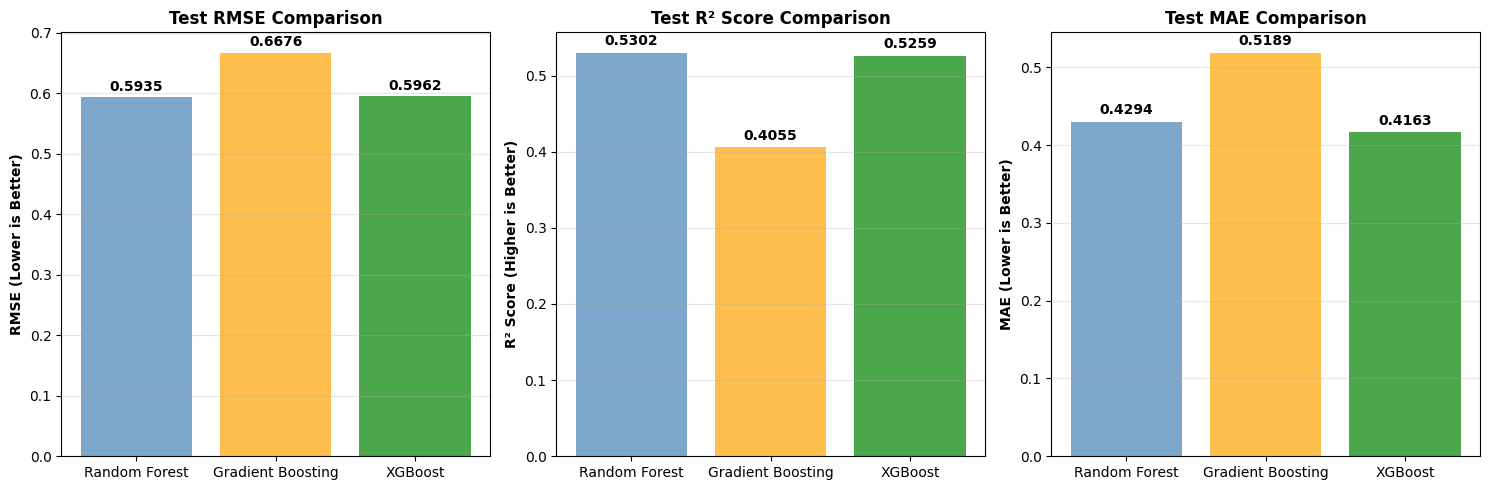

In [72]:
print("\n" + "="*70)
print("Visualization 7: Model Performance Comparison Charts:")
print("="*70)
# Create subplots for comparison
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# RMSE comparison
axes[0].bar(models, test_rmse_values, color=['steelblue', 'orange', 'green'], alpha=0.7)
axes[0].set_ylabel('RMSE (Lower is Better)', fontweight='bold')
axes[0].set_title('Test RMSE Comparison', fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(test_rmse_values):
    axes[0].text(i, v + 0.01, f'{v:.4f}', ha='center', fontweight='bold')

# R² comparison
axes[1].bar(models, test_r2_values, color=['steelblue', 'orange', 'green'], alpha=0.7)
axes[1].set_ylabel('R² Score (Higher is Better)', fontweight='bold')
axes[1].set_title('Test R² Score Comparison', fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)
for i, v in enumerate(test_r2_values):
    axes[1].text(i, v + 0.01, f'{v:.4f}', ha='center', fontweight='bold')

# MAE comparison
axes[2].bar(models, test_mae_values, color=['steelblue', 'orange', 'green'], alpha=0.7)
axes[2].set_ylabel('MAE (Lower is Better)', fontweight='bold')
axes[2].set_title('Test MAE Comparison', fontweight='bold')
axes[2].grid(axis='y', alpha=0.3)
for i, v in enumerate(test_mae_values):
    axes[2].text(i, v + 0.01, f'{v:.4f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


Visualization 8: Feature Importance Comparison Charts


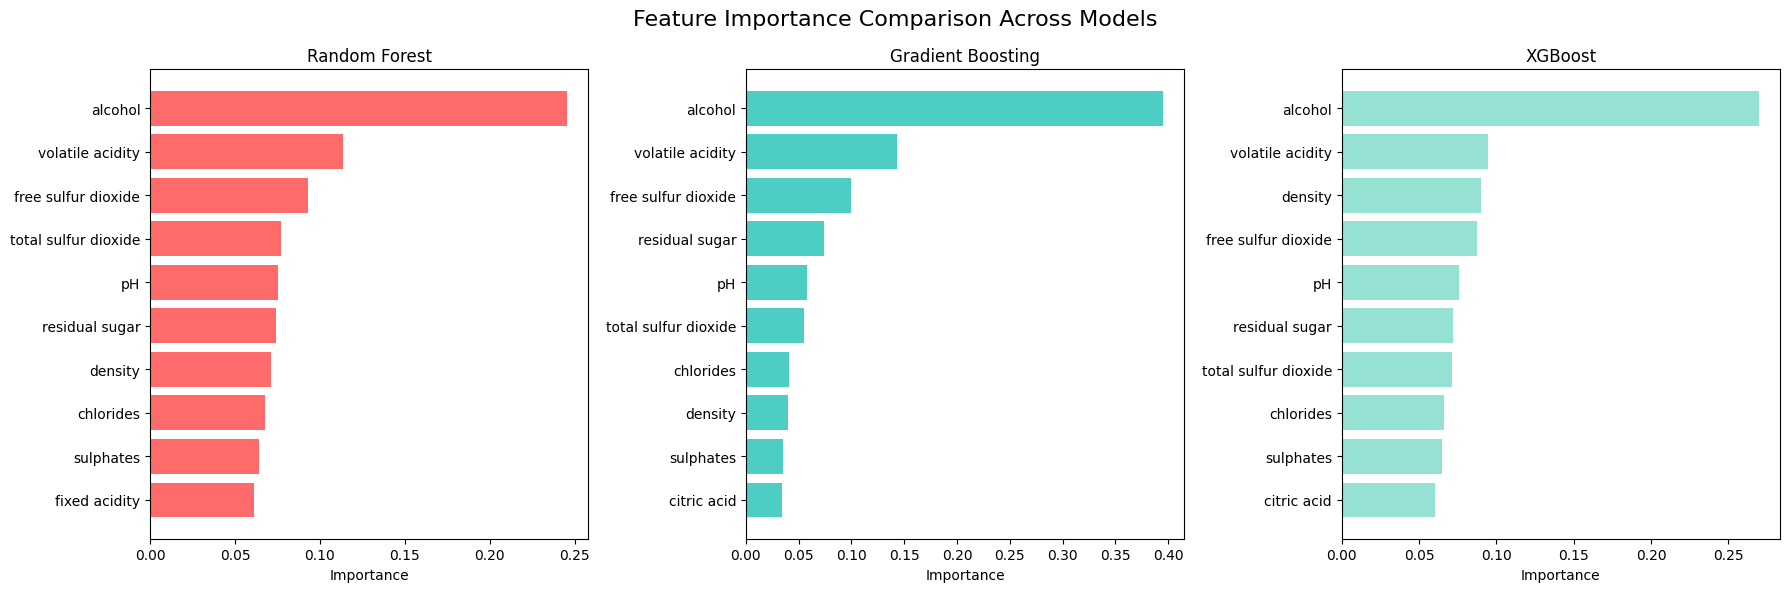

In [73]:
print("\n" + "="*70)
print("Visualization 8: Feature Importance Comparison Charts")
print("="*70)
# Feature importance comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Feature Importance Comparison Across Models', fontsize=16)

# Random Forest
feature_importance_rf_sorted = feature_importance_rf.head(10)
axes[0].barh(feature_importance_rf_sorted['feature'], 
             feature_importance_rf_sorted['importance'], 
             color='#FF6B6B')
axes[0].set_title('Random Forest')
axes[0].set_xlabel('Importance')
axes[0].invert_yaxis()

# Gradient Boosting
feature_importance_gb = pd.DataFrame({
    'feature': X.columns,
    'importance': gb_model.feature_importances_
}).sort_values('importance', ascending=False).head(10)

axes[1].barh(feature_importance_gb['feature'], 
             feature_importance_gb['importance'], 
             color='#4ECDC4')
axes[1].set_title('Gradient Boosting')
axes[1].set_xlabel('Importance')
axes[1].invert_yaxis()


# XGBoost
feature_importance_xgb = pd.DataFrame({
    'feature': X.columns,
    'importance': xgb_final.feature_importances_
}).sort_values('importance', ascending=False).head(10)

axes[2].barh(feature_importance_xgb['feature'], 
             feature_importance_xgb['importance'], 
             color='#95E1D3')
axes[2].set_title('XGBoost')
axes[2].set_xlabel('Importance')
axes[2].invert_yaxis()

plt.tight_layout()
plt.show()

In [74]:
print("\n" + "="*70)
print("Best Performing model")
print("="*70)
# Determine best model using test_rmse_values
best_model_idx = np.argmin([test_rmse_rf, test_rmse_gb, test_rmse_xgb])
models_list = ['Random Forest', 'Gradient Boosting', 'XGBoost']
best_model_name = models_list[best_model_idx]

if best_model_name == 'Random Forest':
    best_model = rf_model
    feature_importance = rf_model.feature_importances_
elif best_model_name == 'Gradient Boosting':
    best_model = gb_model
    feature_importance = gb_model.feature_importances_
else:
    best_model = xgb_final
    feature_importance = xgb_final.feature_importances_

# Create feature importance dataframe
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print(f"\nBest Model: {best_model_name}")
print("\nTop 5 Important Features:")
print(importance_df.head().to_string(index=False))


Best Performing model

Best Model: Random Forest

Top 5 Important Features:
             Feature  Importance
             alcohol    0.245794
    volatile acidity    0.113741
 free sulfur dioxide    0.092796
total sulfur dioxide    0.077349
                  pH    0.075392



Visualization 9: Predictions vs Actual


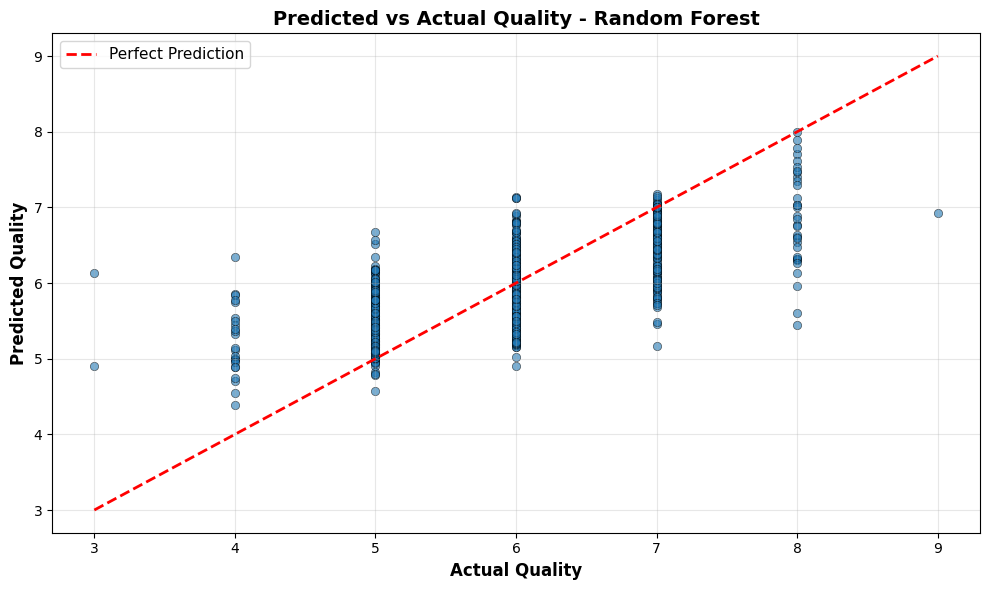

In [80]:
# ============================================================================
# 14. VISUALIZATION 9: PREDICTION vs ACTUAL (BEST MODEL)
# ============================================================================
print("\n" + "="*70)
print("Visualization 9: Predictions vs Actual")
print("="*70)
# Get predictions from best model
if best_model_name == 'Random Forest':
    y_pred = y_test_pred_rf
elif best_model_name == 'Gradient Boosting':
    y_pred = y_test_pred_gb
else:
    y_pred = y_test_pred_xgb

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='black', linewidth=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Quality', fontsize=12, fontweight='bold')
plt.ylabel('Predicted Quality', fontsize=12, fontweight='bold')
plt.title(f'Predicted vs Actual Quality - {best_model_name}', 
          fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [78]:
print("\n" + "="*70)
print("FINAL SUMMARY")
print("="*70)
print(f"\n Dataset: {df_clean.shape[0]} samples after preprocessing")
print(f" Features: {X.shape[1]} physicochemical properties")
print(f" Quality Range: {df_clean['quality'].min()} to {df_clean['quality'].max()}")
print(f"\n Best Performing Model: {best_model_name}")
print(f"  - Test RMSE: {min([test_rmse_rf, test_rmse_gb, test_rmse_xgb]):.4f}")
print(f"  - Test R² Score: {max([test_r2_rf, test_r2_gb, test_r2_xgb]):.4f}")
print(f"  - Test MAE: {min([test_mae_rf, test_mae_gb, test_mae_xgb]):.4f}")
print(f"\n Top 3 Important Features:")
for idx, row in importance_df.head(3).iterrows():
    print(f"  {row['Feature']}: {row['Importance']:.4f}")


FINAL SUMMARY

 Dataset: 4596 samples after preprocessing
 Features: 11 physicochemical properties
 Quality Range: 3 to 9

 Best Performing Model: Random Forest
  - Test RMSE: 0.5935
  - Test R² Score: 0.5302
  - Test MAE: 0.4163

 Top 3 Important Features:
  alcohol: 0.2458
  volatile acidity: 0.1137
  free sulfur dioxide: 0.0928
